In [64]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
#Reading the input data
data = pd.read_table('/content/chimpanze.txt')

In [66]:
#exploring our dataset
data                 #The seven gene families are G-protein coupled receptors, thyrosine kinase, thyrosine phosphate, synthatase, synthase, Ion channel, transcription factor

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6
...,...,...
1677,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1678,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1679,ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...,6
1680,ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...,3


In [67]:
print ('Dataset contain null:\t',data.isnull().values.any())
print ('Describe null:\n',data.isnull().sum())
print ('No of  null:\t',data.isnull().sum().sum())

Dataset contain null:	 False
Describe null:
 sequence    0
class       0
dtype: int64
No of  null:	 0


In [68]:
#converting our large DNA sequence into k-mers words, fixing size = 6
def k_mers(sequence, size=6):
  return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [69]:
#calling the k-mer function
data['words'] = data.apply(lambda x: k_mers(x['sequence']), axis=1)

In [70]:
#dropping our sequence column as we further donot need that
data = data.drop('sequence', axis = 1)

In [71]:
#checking our k_mer words in our dataset
data

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."
...,...,...
1677,5,"[atgctg, tgctga, gctgag, ctgagc, tgagcg, gagcg..."
1678,5,"[atgctg, tgctga, gctgag, ctgagc, tgagcg, gagcg..."
1679,6,"[atgaag, tgaagc, gaagcg, aagcga, agcgac, gcgac..."
1680,3,"[atgact, tgactg, gactgg, actgga, ctggaa, tggaa..."


<Axes: xlabel='class'>

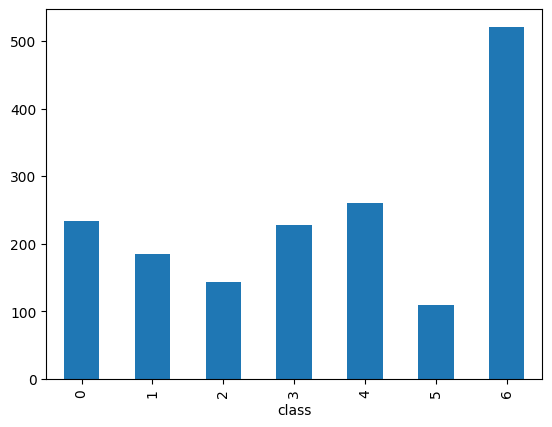

In [72]:
#plotting the graph for these classes
data['class'].value_counts().sort_index().plot.bar()

In [73]:
#converting these k-mer words to string sentences for easy processing
data_texts = list(data['words'])
for item in range(len(data_texts)):
  data_texts[item] = ' '.join(data_texts[item])
y_data = data.iloc[:, 0].values      #target variable

In [74]:
print(data_texts[2])

atggcc tggcct ggcctc gcctcg cctcgc ctcgcg tcgcgc cgcgct gcgctg cgctgg gctggt ctggtg tggtgg ggtggc gtggcg tggcgg ggcggt gcggtg cggtgg ggtggc gtggcg tggcga ggcgac gcgacg cgacgc gacgcg acgcgg cgcggc gcggct cggctg ggctgc gctgct ctgctc tgctcc gctcct ctcctg tcctgg cctgga ctggag tggagg ggaggc gaggcc aggccg ggccgg gccggc ccggcg cggcgg ggcggc gcggcg cggcgc ggcgcg gcgcgg cgcgga gcggag cggagc ggagct gagctc agctcc gctccg ctccgg tccggg ccgggc cgggcc gggccc ggcccg gcccgg cccggc ccggct cggctc ggctcc gctccc ctcccc tcccca ccccag cccagg ccaggc caggcc aggccg ggccgt gccgtg ccgtgc cgtgcg gtgcgg tgcggg gcggga cgggac gggacc ggaccg gaccgt accgtc ccgtcg cgtcgg gtcggg tcgggg cggggc ggggcc gggccg ggccga gccgag ccgagc cgagcg gagcgc agcgcc gcgccg cgccgc gccgct ccgctg cgctgc gctgcc ctgccg tgccga gccgac ccgacg cgacgt gacgtc acgtcc cgtccg gtccgc tccgcg ccgcgc cgcgcg gcgcgc cgcgca gcgcag cgcagg gcaggt caggtt aggttc ggttca gttcat ttcata tcatag catagg ataggc taggcg aggcgg ggcgga gcggaa cggaag ggaagg gaaggg aaggga agggac

In [75]:
y_data

array([4, 4, 4, ..., 6, 3, 3])

In [76]:
#converting these strings into bag of words using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(data_texts)

In [78]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.20, random_state=42)

In [79]:
print(X_train.shape)
print(X_test.shape)

(1345, 229684)
(337, 229684)


In [80]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
predictions_test_nb = nb_classifier.predict(X_test)
accuracy_test_nb = accuracy_score(y_test, predictions_test_nb)
print('Accuracy using Naive Bayes:', accuracy_test_nb)


Accuracy using Naive Bayes: 0.913946587537092


In [81]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions_test_nb = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy_test_nb = accuracy_score(y_test, predictions_test_nb)
print('Accuracy using Naive Bayes:', accuracy_test_nb)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_test_nb)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy using Naive Bayes: 0.913946587537092
Confusion Matrix:
[[ 25   0   0   0   1   2   0]
 [  0  38   0   1   0   0   0]
 [  0   0  26   0   0   0   1]
 [  0   0   0  41   2   0   0]
 [  0   1   0   5  44   0   2]
 [  3   0   0   0   3  21   2]
 [  0   0   0   6   0   0 113]]


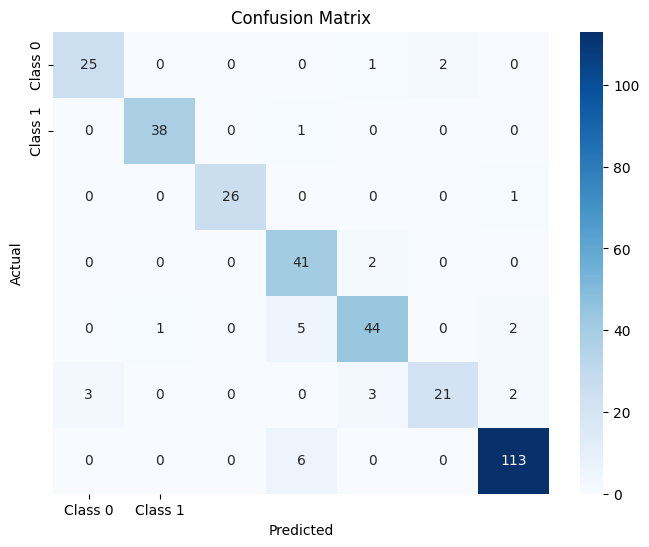

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
